<a href="https://colab.research.google.com/github/Mayank-Chandra17/Handwritten_Digit_Prediction/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,816 (1.20 MB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,878 (819.84 KB)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8323 - loss: 0.4872 - val_accuracy: 0.9745 - val_loss: 0.0906
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9938 - loss: 0.0258 - val_accuracy: 0.9751 - val_loss: 0.0945
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9967 - loss: 0.0154 - val_accuracy: 0.9762 - val_loss: 0.0921
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9973 - loss: 0.0115 - val_accuracy: 0.9751 - val_loss: 0.1023
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9978 - loss: 0.0085 - val_accuracy: 0.9768 - val_loss: 0.1046
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9984 - loss: 0.0068 - val_accuracy: 0.9743 - val_loss: 0.1176
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9988 - loss: 0.0054 - val_accuracy: 0.9772 - val_loss: 0.1160
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9980 - loss: 0.00

In [ ]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9761

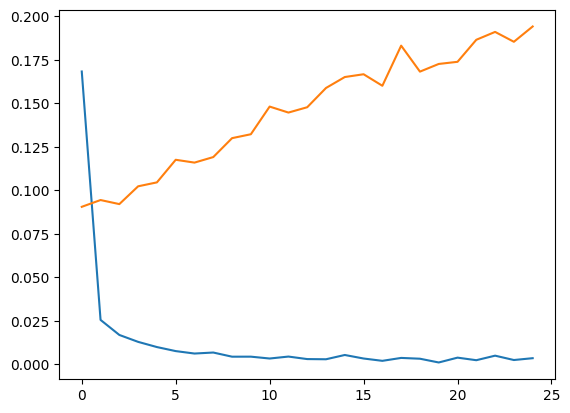

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

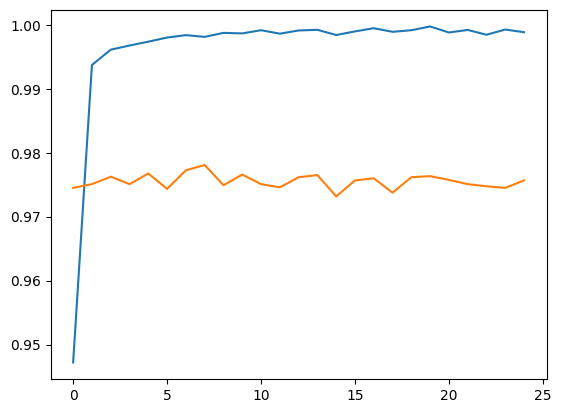

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

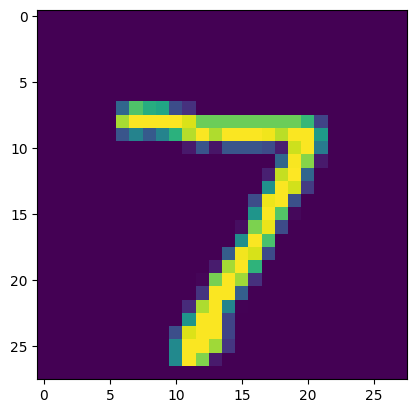

In [ ]:
plt.imshow(X_test[0])

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([7])